# Groundwater Flow Velocity
<p>Determining the velocity of groundwater flow is important for describing solute transport, as advection occurs with the bulk motion groundwater flow. Flow is described using the <b>Darcy velocity</b> and <b>porosity</b>:</p>
<h3><center>$ \bar{u} = \frac{q}{\theta}$</center></h3>
<p>This equation can be used to solve for the time that a contaminant spill would take to arrive at a well. In order to do so, we must know the path that groundwater would take, and therefore the distance of the path. If we knew, the distance, the time between a spill and chemicals showing up at the well would be:</p>
<h3><center>$t = \frac{d \theta}{q} $</center></h3>
<p>Where $d$ is distance, $\theta$ is porosity, and $q$ is Darcy velocity.</p>

In [1]:
def averageVelocity(q, theta):
    '''
    Returns the average velocity, for both single values and an array
    '''
    return q/theta

def soluteTransportTime(q, theta, d):
    '''
    Returns the average solute transport time. 
    It does not take into account diffusion or dispersion
    '''
    return (d*theta)/q

## Determining flow path
<p>To find the flow path, I start at a single position. At this point, I take a step towards the direction of lowest descent. I keep doing this until I reach a point where all points around me are either less than or equal to the current value. Additionally, at each point along the path, I record the position of each subsequent step.</p>

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def flowPath(arr, Pos):
    """
    - This function returns a list of tuples containing positions.
    - At each step, each of the four directions is checked for the greatest descent. For each step, there is a
        carryover, which takes into account some flow that isn't 3D.
    - This function uses some helper functions to make the code a bit less daunting
    """
    flowPath = [(Pos[1],Pos[0])]
    #flowPathX = [Pos[1]]
    #flowPathY = [Pos[0]]
    carryOverX, carryOverY = 0, 0   # Used to model some type of radial flow, but not yet
    finalHeight = arr.shape[0] - 1
    finalWidth = arr.shape[1] - 1
    x = pos[0]
    y = pos[1]
    atBottom = False  # Used for determining whether the point is at a local minimum
    previous = (-1,-1)
    currentHead = 10000000
    
    # Main loop
    while not atBottom:
        # Check to see if on edge or corner
        if isBoundary(arr,pos):
            print("Found a boundary")
            atBottom = True   # For now, just stop if you hit a boundary
            break
        
        else:
            #print("Took path 2")
            # Main function of the loop
            up = (arr[y - 1, x], 'u', (x, y - 1))   # For numpy arrays, the top row is 0, so row number increses as you move down
            down = (arr[y + 1, x], 'd', (x, y + 1))
            left = (arr[y, x - 1], 'l', (x - 1, y))
            right = (arr[y, x + 1], 'r', (x + 1, y))
            
            directions = [up, down, left, right]
            #print("Directions: ",directions)
            
            # Order the directions from smallest to largest
            while not (directions[0][0] <= directions[1][0] <= directions[2][0] <= directions[3][0]):
                #print("Took path 3")
                for i in range(3):
                    if directions[i][0] > directions[i + 1][0]:
                        directions[i],directions[i + 1] = directions[i + 1],directions[i]
            
            # Determine if flow should stop, such as if
            if previous == directions[0][1]:
                #print("Took path 4")
                atBottom = True
                break
            
            # Chose the best way to decrease
            elif previous != directions[0][1]:
                #print("Took path 5")
                if directions[0][2] not in flowPath:
                    flowPath.append((directions[0][2]))
                    #flowPathX.append(directions[0][2][0])
                    #flowPathY.append(directions[0][2][1])
                else:
                    print("Path found")
                    return flowPath
                x = directions[0][2][0]
                y = directions[0][2][1]
                
                
                
    
    
    return flowPath #, flowPathX, flowPathY

#-------------------------------------------------------------
# Helper functions:
# Just some functions to make things a bit easier to read
#-------------------------------------------------------------
def isBoundary(arr, pos):
    """
    Checks to see if the given position is along a boundary
    """
    xPos = pos[0]
    yPos = pos[1]
    finalLength = arr.shape[1] - 1
    finalDepth = arr.shape[0] - 1
    
    if (xPos == 0) or (xPos == finalLength) or (yPos == 0) or (yPos == finalDepth):
        return True
    else:
        return False
    
def isTopEdge(y):
    if y == 0:
        return True
    else:
        return False


def isBottomEdge(depth,y):
    if y == depth:
        return True
    else:
        return False
    

def isLeftEdge(x):
    if x == 0:
        return True
    else:
        return False
    

def isRightEdge(width,x):
    if x == width:
        return True
    else:
        return False
    

def isTopLeftCorner(x,y):
    if x == 0 and y == 0:
        return True
    else:
        return False


def isTopRightCorner(x,y,width):
    if x == width and y == 0:
        return True
    else:
        return False


def isBottomLeftCorner(x,y,depth):
    if x == 0 and y == depth:
        return True
    else:
        return False
    

def isBottomRightCorner(x,y,width,depth):
    if x == width and y == depth:
        return True
    else:
        return False
    
    

## Testing the first model

Path found
path: [(3, 2), (2, 2), (1, 2)]
Path: [(3, 2), (2, 2), (1, 2)]


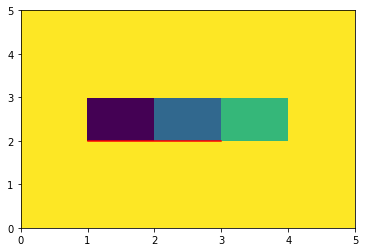

In [64]:
x = np.full((5,5),3)
x[2,1] = 0
x[2,2] = 1
x[2,3] = 2
pos = (2,3)

path  = flowPath(x,pos)
print("path:",path)
X = [path[i][0] for i in range(len(path))]
Y = [path[i][1] for i in range(len(path))]
print("Path:",path)
plt.pcolormesh(x)
plt.plot(X,Y, color = 'red')
plt.show()

## More about diffusion and dispersion
### Diffusion
<p><b>Fick's Law</b> is the equation that describes the diffusion of solute over distance:</p>
<h3><center>$ J = -D \frac{dC}{dx} $</center></h3>
<p>Where $J$ is <b>diffusion flux</b>, which is the amount of substance passing through a unit area per unit time, $D$ is diffusivity, with units $\frac{A}{T}$, and $C$ is concentration. In a more general sense, the equation can be written as:</p>
<h3><center>$J = -D \nabla C$</center></h3>

## Solute Transport
<p>Solute transport in the ground occurs by three methods: advection, diffusion, and dispersion.</p>
-<b>Advection</b> is the process of carrying the solute along with bulk fluid motion.<br>
-<b>Diffusion</b> is the process of regions of higher solute concentration flowing to lower ones. It is a <u>microscopic</u> process that is the result of random molecular motion.<br>
-<b>Dispersion</b> is similar to diffusion, but it is a <u>macroscopic</u> process. It is the result of <u>non-ideal</u> flow patterns, such as the flow between the grains within soil.

<p>These three concepts are incorporated into the <b>Advection-dispersion Reaction (ADR) equation:</b></p>
<h3><center>$\frac{\partial C}{\partial t} = D_{x} \frac{\partial^{2} C}{\partial x^{2}} + D_{y} \frac{\partial^{2} C}{\partial y^{2}} + D_{z} \frac{\partial^{2} C}{\partial z^{2}} - \nu \frac{\partial C}{\partial x} - \lambda RC$</center></h3>
<p>Where $D_{x}$, $D_{y}$, and $D_{z}$ are the hydrodynamic dispersive coefficients in each direction (how quickly solute disperses), $\nu$ is the advective velocity  in the <b>x</b> direction, $lambda$ is a decay rate, which encompasses biotic and abiotic processes that decrease solute amount, and $R$ is the <u>linear</u> equilibrium retardation factor, which is something else that I don't really know.</p>

### Dispersion coefficients
<p>Each of the dispersion coefficients is covers both diffusion and dispersion, and can therefore be broken up into its components:</p>
<h3><center>$D = D_{m} + \nu \alpha$</center></h3>
<p>Where $D_{m}$ is the <b>molecular diffusion coefficient</b> and $\alpha$ is the dispersivity, and is defined in the longitudinal, transverse, and vertical directions.</p>
<p>In order to describe these things, though, we need information on the velocity of the flow at each point to describe stuff more</p>